In [1]:
from unstructured_resample import LegacyVTKReader
import numpy as np
import sys, os, subprocess
import matplotlib.pyplot as plt
from skimage import measure
from scipy import ndimage
from PIL import Image
import imageio.v3 as iio
import io
import matplotlib.patheffects as pe


from vtianalysis import *
from methods_dump import *
from vtkanalysis import *



Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
dir_path = r"E:\2024_05_08\1327rpm_downstream"
muvi = VTIAnalysis(dir_path)
vtk = VTKAnalysis(r"E:\sim_1545")


In [3]:
median_particle_spacings_file = os.path.join(muvi.tracks_path, "median_particle_spacings.pkl")
# Load the median particle spacings from the pickle file
with open(median_particle_spacings_file, 'rb') as f:
    median_particle_spacings = pickle.load(f)
spacings = [spacing for _, spacing in median_particle_spacings]
median_particle_spacing1 = np.mean(spacings)
median_particle_spacing1


3.464465020276442

In [4]:
vtk.experimental_velocity_resample(median_particle_spacing=median_particle_spacing1)

Saved .vtp for frame 0080
Strain resample 20.28 s
Saved resampled values for frame 0080 to .npy
Saved .vtp for frame 0081
Strain resample 20.19 s
Saved resampled values for frame 0081 to .npy
Saved .vtp for frame 0082
Strain resample 20.43 s
Saved resampled values for frame 0082 to .npy
Saved .vtp for frame 0083
Strain resample 20.26 s
Saved resampled values for frame 0083 to .npy
Saved .vtp for frame 0084
Strain resample 20.57 s
Saved resampled values for frame 0084 to .npy
Saved .vtp for frame 0085


KeyboardInterrupt: 

In [7]:
frame=84
R=np.load(os.path.join(vtk.npz_dir_path, f'R_frame_{frame:04}.npy'))
V=np.load(os.path.join(vtk.npz_dir_path, f'V_frame_{frame:04}.npy'))
ω=np.load(os.path.join(vtk.npz_dir_path, f'vorticity_frame_{frame:04}.npy'))
V.shape

(26, 26, 535, 3)

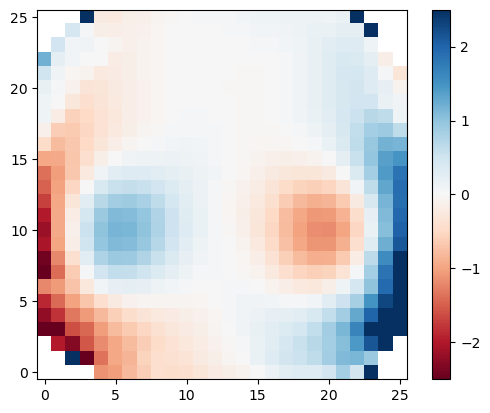

In [10]:
plt.imshow(ω[:,:,400,0], cmap='RdBu',origin='lower')
plt.clim(-2.5,2.5)
plt.colorbar()

In [11]:
from pyevtk.hl import gridToVTK

velocity_magnitude = np.linalg.norm(V, axis=-1)
vort_magnitude = np.linalg.norm(ω, axis=-1)
x = np.arange(-V.shape[0], V.shape[0], 2)
y = np.arange(-V.shape[1], V.shape[1], 2)
z = np.arange(-V.shape[2], V.shape[2], 2)

velocity_x = V[..., 0]
velocity_x = np.ascontiguousarray(velocity_x, dtype=np.float64)
velocity_y = V[..., 1]
velocity_y = np.ascontiguousarray(velocity_y, dtype=np.float64)
velocity_z = V[..., 2]
velocity_z = np.ascontiguousarray(velocity_z, dtype=np.float64)
vorticity_x = ω[..., 0]
vorticity_x = np.ascontiguousarray(vorticity_x, dtype=np.float64)
vorticity_y = ω[..., 1]
vorticity_y = np.ascontiguousarray(vorticity_y, dtype=np.float64)
vorticity_z = ω[..., 2]
vorticity_z = np.ascontiguousarray(vorticity_z, dtype=np.float64)
gridToVTK(os.path.join(vtk.npz_dir_path, f'sim_points_resample_{frame}'), x, y, z, pointData={'velocity_magnitude':velocity_magnitude, 'vx':velocity_x, 'vy':velocity_y, 'vz':velocity_z,'vorticity_magnitude':vort_magnitude, 'vortx':vorticity_x, 'vorty':vorticity_y, 'vortz':vorticity_z})


'E:\\sim_1545\\npz_files\\sim_points_resample_84.vtr'

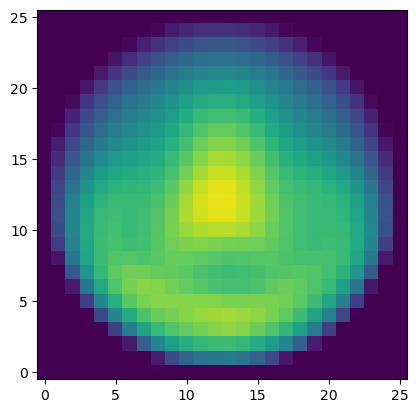

In [18]:
plt.imshow(V[:,:,250,0],origin='lower')
plt.clim(0,55)

In [3]:
vtk.compute_values(vort_range=(0.1,5))

Resampling frame: 80...
Resampling frame: 81...
Resampling frame: 82...
Resampling frame: 83...
Resampling frame: 84...
Resampling frame: 85...
Resampling frame: 86...
Resampling frame: 87...
Resampling frame: 88...
Resampling frame: 89...
Resampling frame: 90...
Resampling frame: 91...
Resampling frame: 92...
Resampling frame: 93...
Resampling frame: 94...
Resampling frame: 95...
Resampling frame: 96...
Resampling frame: 97...
Resampling frame: 98...
Resampling frame: 99...
Resampling frame: 100...
Resampling frame: 101...
Resampling frame: 102...
Resampling frame: 103...
Resampling frame: 104...
Resampling frame: 105...
Resampling frame: 106...
Resampling frame: 107...
Resampling frame: 108...
Resampling frame: 109...
Resampling frame: 110...
Resampling frame: 111...
Resampling frame: 112...
Resampling frame: 113...
Resampling frame: 114...
Resampling frame: 115...
Resampling frame: 116...
Resampling frame: 117...
Resampling frame: 118...
Resampling frame: 119...
Resampling frame: 12

In [3]:
muvi.vortex_core_info()

Compiled info for frame 0...
Left Circ: -226.6, Right Circ: 185.6
Compiled info for frame 1...
Left Circ: -191.2, Right Circ: 193.6
Compiled info for frame 2...
Left Circ: -193.0, Right Circ: 193.6
Compiled info for frame 3...
Left Circ: -192.5, Right Circ: 204.1
Compiled info for frame 4...
Left Circ: -194.6, Right Circ: 212.6
Compiled info for frame 5...
Left Circ: -205.4, Right Circ: 222.1
Compiled info for frame 6...
Left Circ: -209.3, Right Circ: 200.8
Compiled info for frame 7...
Left Circ: -185.7, Right Circ: 205.4
Compiled info for frame 8...
Left Circ: -199.9, Right Circ: 215.0
Compiled info for frame 9...
Left Circ: -208.4, Right Circ: 203.2
Compiled info for frame 10...
Left Circ: -206.3, Right Circ: 219.4
Compiled info for frame 11...
Left Circ: -202.8, Right Circ: 215.4
Compiled info for frame 12...
Left Circ: -197.0, Right Circ: 212.6
Compiled info for frame 13...
Left Circ: -208.8, Right Circ: 226.8
Compiled info for frame 14...
Left Circ: -211.1, Right Circ: 208.6
Compi

In [30]:
exp_df = pd.read_pickle(os.path.join(muvi.measure_path, 'vortex_measurements.pkl'))
sim_df = pd.read_pickle(os.path.join(vtk.npz_dir_path, 'vtk_data.pkl'))
stats_data_exp = pd.read_pickle(os.path.join(muvi.measure_path, 'vortex_measurements_avg.pkl'))
stats_data_sim = pd.read_pickle(os.path.join(vtk.npz_dir_path, 'vtk_stats_data.pkl'))
stats_data_exp

,x,right_circ_mean,right_circ_std,right_circ_d_mean,right_circ_d_std,right_circ_y_mean,right_circ_y_std,right_circ_z_mean,right_circ_z_std,right_dye_y_mean,...,left_circ_y_mean,left_circ_y_std,left_circ_z_mean,left_circ_z_std,left_dye_y_mean,left_dye_y_std,left_dye_z_mean,left_dye_z_std,left_error_mean,left_error_std
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,978.0,-80.041160,1.456878,-74.162157,1.688605,8.546501,0.041046,-1.479475,0.152615,7.521071,...,-7.390917,0.055518,-0.643655,0.175831,-6.807638,0.102235,-0.370236,0.338418,0.757856,0.181713
490,980.0,-79.615869,1.651299,-74.049290,1.481034,8.532498,0.031059,-1.581648,0.101048,7.517230,...,-7.361258,0.062804,-0.637108,0.157327,-6.801643,0.093807,-0.362095,0.299960,0.730322,0.168846
491,982.0,-79.573559,1.147781,-74.130382,0.863591,8.519044,0.021336,-1.600158,0.087130,7.525262,...,-7.330592,0.044902,-0.607975,0.132962,-6.813875,0.082438,-0.343074,0.248650,0.655288,0.154497
492,984.0,-79.062484,0.602121,-73.664908,0.627387,8.523956,0.014631,-1.590594,0.041011,7.510781,...,-7.319486,0.038459,-0.654696,0.077577,-6.820337,0.066890,-0.305536,0.195803,0.641865,0.156589


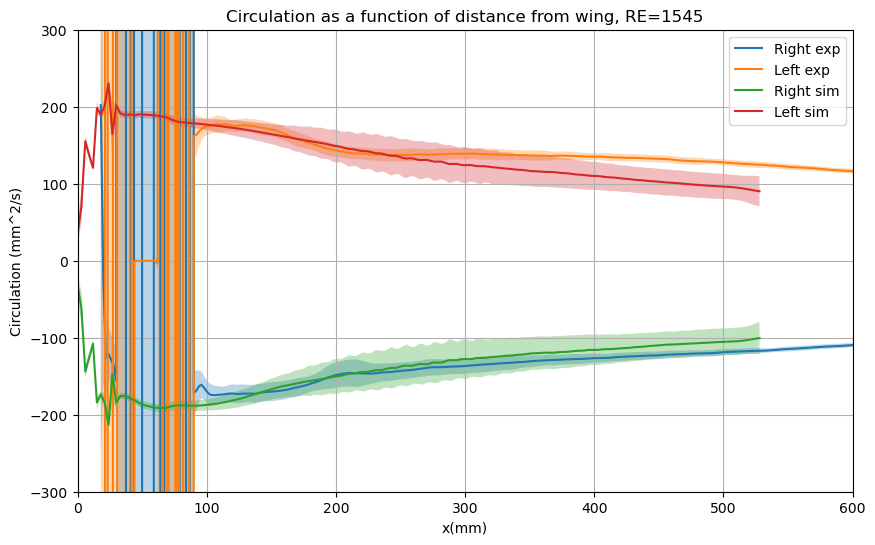

In [31]:
from scipy.stats import linregress
x_values_exp = stats_data_exp['x']
right_mean_exp = stats_data_exp['right_circ_d_mean']
right_std_exp = stats_data_exp['right_circ_d_std']
left_mean_exp = stats_data_exp['left_circ_d_mean']
left_std_exp = stats_data_exp['left_circ_d_std']

x_values_sim = stats_data_sim['x']
right_mean_sim = stats_data_sim['right_circ_d_mean']
right_std_sim = stats_data_sim['right_circ_d_std']
left_mean_sim = stats_data_sim['left_circ_d_mean']
left_std_sim = stats_data_sim['left_circ_d_std']

x_values_exp = pd.to_numeric(stats_data_exp['x'], errors='coerce')
x_values_sim = pd.to_numeric(stats_data_sim['x'], errors='coerce')

x_slope_start = 200
x_slope_end = 500

# Filter data within the range x = 100 to x = 300
def filter_data(x_values, mean_values, std_values, start=x_slope_start, end=x_slope_end):
    mask = (x_values >= start) & (x_values <= end)
    return x_values[mask], mean_values[mask], std_values[mask]

x_values_exp_100_300, right_mean_exp_100_300, _ = filter_data(x_values_exp, right_mean_exp, right_std_exp)
_, left_mean_exp_100_300, _ = filter_data(x_values_exp, left_mean_exp, left_std_exp)
x_values_sim_100_300, right_mean_sim_100_300, _ = filter_data(x_values_sim, right_mean_sim, right_std_sim)
_, left_mean_sim_100_300, _ = filter_data(x_values_sim, left_mean_sim, left_std_sim)

# Perform linear regression
def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, r_value

right_slope_exp, right_r_exp= linear_regression(x_values_exp_100_300, right_mean_exp_100_300)
left_slope_exp, left_r_exp= linear_regression(x_values_exp_100_300, left_mean_exp_100_300)
right_slope_sim, right_r_sim= linear_regression(x_values_sim_100_300, right_mean_sim_100_300)
left_slope_sim, left_r_sim= linear_regression(x_values_sim_100_300, left_mean_sim_100_300)

plt.figure(figsize=(10, 6))
# plt.plot(x_values_exp, right_mean_exp, label=f'Right exp slope={right_slope_exp:.2f}, R={right_r_exp:.2f}')
# plt.fill_between(x_values_exp, right_mean_exp-right_std_exp, right_mean_exp+right_std_exp, alpha=0.3)
# plt.plot(x_values_exp, left_mean_exp, label=f'Left exp slope={left_slope_exp:.2f}, R={left_r_exp:.2f}')
# plt.fill_between(x_values_exp, left_mean_exp-left_std_exp, left_mean_exp+left_std_exp, alpha=0.3)
# plt.plot(x_values_sim, right_mean_sim, label=f'Left sim slope={right_slope_sim:.2f}, R={right_r_sim:.2f}')
# plt.fill_between(x_values_sim, right_mean_sim-right_std_sim, right_mean_sim+right_std_sim, alpha=0.3)
# plt.plot(x_values_sim, left_mean_sim, label=f'Right sim slope={left_slope_sim:.2f}, R={left_r_sim:.2f}')
# plt.fill_between(x_values_sim, left_mean_sim-left_std_sim, left_mean_sim+left_std_sim, alpha=0.3)
# plt.vlines(x_slope_start,-300,300)
# plt.vlines(x_slope_end,-300,300)


plt.plot(x_values_exp, right_mean_exp, label=f'Right exp')
plt.fill_between(x_values_exp, right_mean_exp-right_std_exp, right_mean_exp+right_std_exp, alpha=0.3)
plt.plot(x_values_exp, left_mean_exp, label=f'Left exp')
plt.fill_between(x_values_exp, left_mean_exp-left_std_exp, left_mean_exp+left_std_exp, alpha=0.3)
plt.plot(x_values_sim, left_mean_sim, label=f'Right sim')
plt.fill_between(x_values_sim, left_mean_sim-left_std_sim, left_mean_sim+left_std_sim, alpha=0.3)
plt.plot(x_values_sim, right_mean_sim, label=f'Left sim')
plt.fill_between(x_values_sim, right_mean_sim-right_std_sim, right_mean_sim+right_std_sim, alpha=0.3)


plt.xlabel('x(mm)')
plt.ylabel('Circulation (mm^2/s)')
plt.title('Circulation as a function of distance from wing, RE=1545')
plt.legend()
plt.xlim(0,600)
plt.ylim(-300,300)
plt.grid(True)
plt.show()

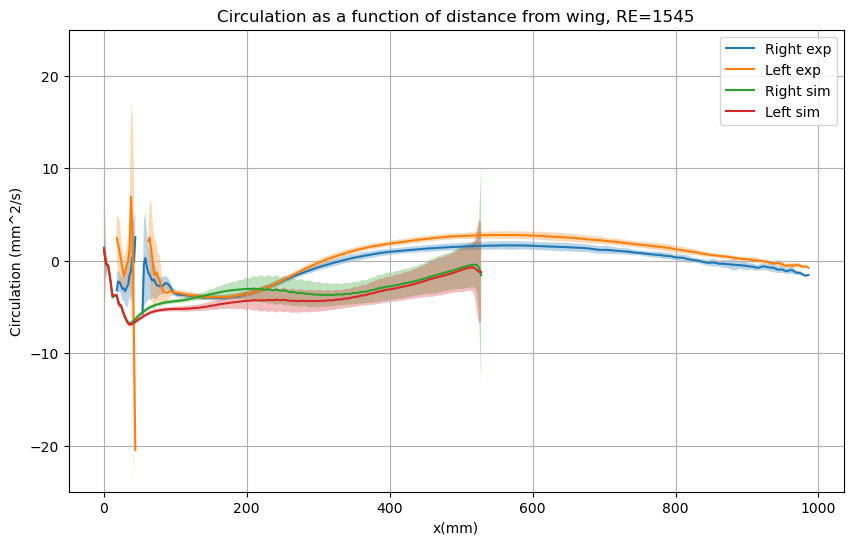

In [29]:
from scipy.stats import linregress
x_values_exp = stats_data_exp['x']
right_mean_exp = stats_data_exp['right_circ_z_mean']
right_std_exp = stats_data_exp['right_circ_z_std']
left_mean_exp = stats_data_exp['left_circ_z_mean']
left_std_exp = stats_data_exp['left_circ_z_std']

x_values_sim = stats_data_sim['x']
right_mean_sim = stats_data_sim['right_circ_z_mean']
right_std_sim = stats_data_sim['right_circ_z_std']
left_mean_sim = stats_data_sim['left_circ_z_mean']
left_std_sim = stats_data_sim['left_circ_z_std']

plt.figure(figsize=(10, 6))

plt.plot(x_values_exp, right_mean_exp, label=f'Right exp')
plt.fill_between(x_values_exp, right_mean_exp-right_std_exp, right_mean_exp+right_std_exp, alpha=0.3)
plt.plot(x_values_exp, left_mean_exp, label=f'Left exp')
plt.fill_between(x_values_exp, left_mean_exp-left_std_exp, left_mean_exp+left_std_exp, alpha=0.3)
plt.plot(x_values_sim, left_mean_sim, label=f'Right sim')
plt.fill_between(x_values_sim, left_mean_sim-left_std_sim, left_mean_sim+left_std_sim, alpha=0.3)
plt.plot(x_values_sim, right_mean_sim, label=f'Left sim')
plt.fill_between(x_values_sim, right_mean_sim-right_std_sim, right_mean_sim+right_std_sim, alpha=0.3)


plt.xlabel('x(mm)')
plt.ylabel('Circulation (mm^2/s)')
plt.title('Circulation as a function of distance from wing, RE=1545')
plt.legend()
# plt.xlim(0,600)
plt.ylim(-25,25)
plt.grid(True)
plt.show()

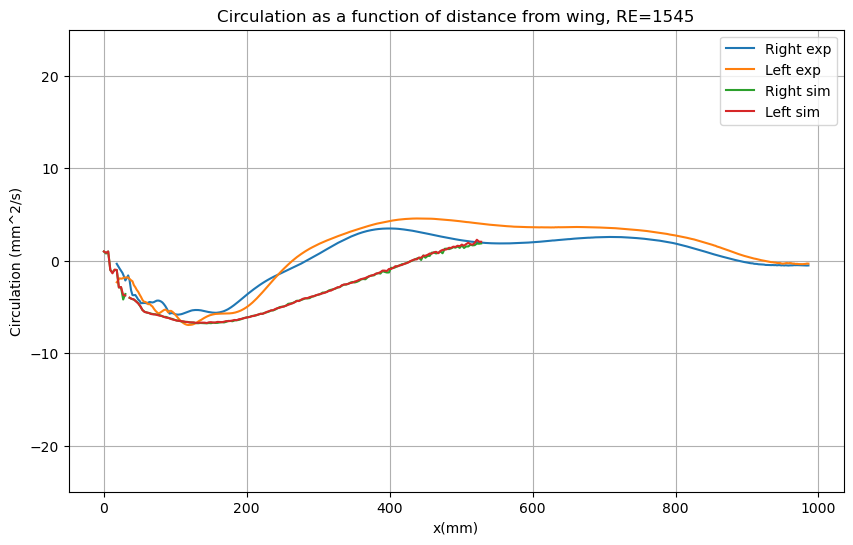

In [28]:
x_values_exp = stats_data_exp['x']
right_mean_exp = stats_data_exp['right_dye_z_mean']
right_std_exp = stats_data_exp['right_dye_z_std']
left_mean_exp = stats_data_exp['left_dye_z_mean']
left_std_exp = stats_data_exp['left_dye_z_std']

x_values_sim = stats_data_sim['x']
right_mean_sim = stats_data_sim['right_dye_z_mean']
right_std_sim = stats_data_sim['right_dye_z_std']
left_mean_sim = stats_data_sim['left_dye_z_mean']
left_std_sim = stats_data_sim['left_dye_z_std']

plt.figure(figsize=(10, 6))

plt.plot(x_values_exp, right_mean_exp, label=f'Right exp')
# plt.fill_between(x_values_exp, right_mean_exp-right_std_exp, right_mean_exp+right_std_exp, alpha=0.3)
plt.plot(x_values_exp, left_mean_exp, label=f'Left exp')
# plt.fill_between(x_values_exp, left_mean_exp-left_std_exp, left_mean_exp+left_std_exp, alpha=0.3)
plt.plot(x_values_sim, left_mean_sim, label=f'Right sim')
# plt.fill_between(x_values_sim, left_mean_sim-left_std_sim, left_mean_sim+left_std_sim, alpha=0.3)
plt.plot(x_values_sim, right_mean_sim, label=f'Left sim')
# plt.fill_between(x_values_sim, right_mean_sim-right_std_sim, right_mean_sim+right_std_sim, alpha=0.3)


plt.xlabel('x(mm)')
plt.ylabel('Circulation (mm^2/s)')
plt.title('Circulation as a function of distance from wing, RE=1545')
plt.legend()
# plt.xlim(0,600)
plt.ylim(-25,25)
plt.grid(True)
plt.show()

In [10]:
left_mean_sim.isnan()


AttributeError: 'Series' object has no attribute 'isnan'

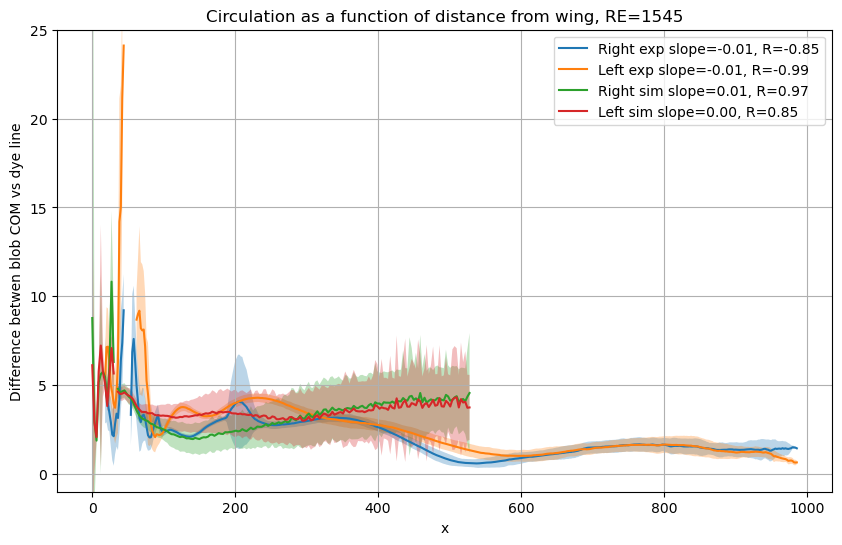

In [13]:
from scipy.stats import linregress
x_values_exp = stats_data_exp['x']
right_mean_exp = stats_data_exp['right_error_mean']
right_std_exp = stats_data_exp['right_error_std']
left_mean_exp = stats_data_exp['left_error_mean']
left_std_exp = stats_data_exp['left_error_std']

x_values_sim = stats_data_sim['x']
right_mean_sim = stats_data_sim['right_err_mean']
right_std_sim = stats_data_sim['right_err_std']
left_mean_sim = stats_data_sim['left_err_mean']
left_std_sim = stats_data_sim['left_err_std']

x_values_exp = pd.to_numeric(stats_data_exp['x'], errors='coerce')
x_values_sim = pd.to_numeric(stats_data_sim['x'], errors='coerce')

x_slope_start = 200
x_slope_end = 500

# Filter data within the range x = 100 to x = 300
def filter_data(x_values, mean_values, std_values, start=x_slope_start, end=x_slope_end):
    mask = (x_values >= start) & (x_values <= end)
    return x_values[mask], mean_values[mask], std_values[mask]

x_values_exp_100_300, right_mean_exp_100_300, _ = filter_data(x_values_exp, right_mean_exp, right_std_exp)
_, left_mean_exp_100_300, _ = filter_data(x_values_exp, left_mean_exp, left_std_exp)
x_values_sim_100_300, right_mean_sim_100_300, _ = filter_data(x_values_sim, right_mean_sim, right_std_sim)
_, left_mean_sim_100_300, _ = filter_data(x_values_sim, left_mean_sim, left_std_sim)

# Perform linear regression
def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, r_value

right_slope_exp, right_r_exp= linear_regression(x_values_exp_100_300, right_mean_exp_100_300)
left_slope_exp, left_r_exp= linear_regression(x_values_exp_100_300, left_mean_exp_100_300)
right_slope_sim, right_r_sim= linear_regression(x_values_sim_100_300, right_mean_sim_100_300)
left_slope_sim, left_r_sim= linear_regression(x_values_sim_100_300, left_mean_sim_100_300)

plt.figure(figsize=(10, 6))
plt.plot(x_values_exp, right_mean_exp, label=f'Right exp slope={right_slope_exp:.2f}, R={right_r_exp:.2f}')
plt.fill_between(x_values_exp, right_mean_exp-right_std_exp, right_mean_exp+right_std_exp, alpha=0.3)
plt.plot(x_values_exp, left_mean_exp, label=f'Left exp slope={left_slope_exp:.2f}, R={left_r_exp:.2f}')
plt.fill_between(x_values_exp, left_mean_exp-left_std_exp, left_mean_exp+left_std_exp, alpha=0.3)
plt.plot(x_values_sim, right_mean_sim, label=f'Right sim slope={right_slope_sim:.2f}, R={right_r_sim:.2f}')
plt.fill_between(x_values_sim, right_mean_sim-right_std_sim, right_mean_sim+right_std_sim, alpha=0.3)
plt.plot(x_values_sim, left_mean_sim, label=f'Left sim slope={left_slope_sim:.2f}, R={left_r_sim:.2f}')
plt.fill_between(x_values_sim, left_mean_sim-left_std_sim, left_mean_sim+left_std_sim, alpha=0.3)
# plt.vlines(x_slope_start,-300,300)
# plt.vlines(x_slope_end,-300,300)

plt.xlabel('x')
plt.ylabel('Difference betwen blob COM vs dye line')
plt.title('Circulation as a function of distance from wing, RE=1545')
plt.legend()
# plt.xlim(0,600)
plt.ylim(-1,25)
plt.grid(True)
plt.show()

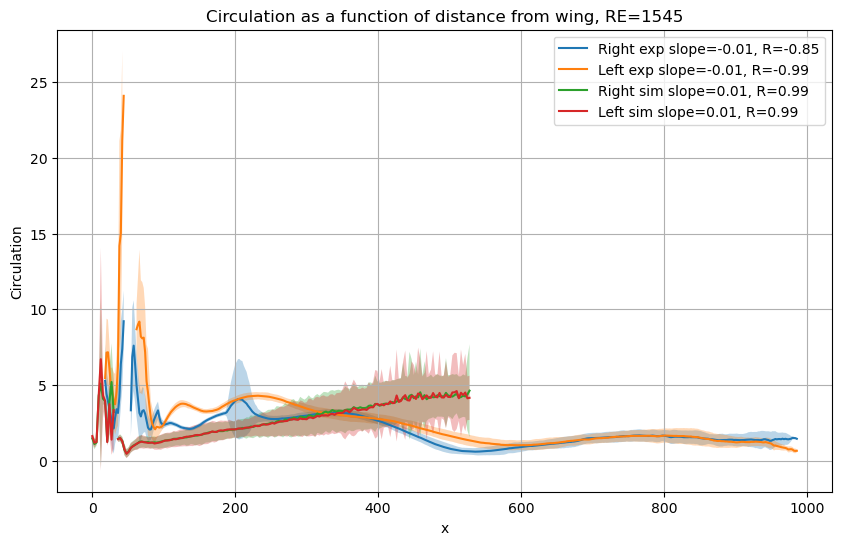

In [42]:
from scipy.stats import linregress
x_values_exp = stats_data_exp['x']
right_mean_exp = stats_data_exp['right_error_mean']
right_std_exp = stats_data_exp['right_error_std']
left_mean_exp = stats_data_exp['left_error_mean']
left_std_exp = stats_data_exp['left_error_std']

x_values_sim = stats_data_sim['x']
right_mean_sim = stats_data_sim['right_err_mean']
right_std_sim = stats_data_sim['right_err_std']
left_mean_sim = stats_data_sim['left_err_mean']
left_std_sim = stats_data_sim['left_err_std']

x_values_exp = pd.to_numeric(stats_data_exp['x'], errors='coerce')
x_values_sim = pd.to_numeric(stats_data_sim['x'], errors='coerce')

x_slope_start = 200
x_slope_end = 500

# Filter data within the range x = 100 to x = 300
def filter_data(x_values, mean_values, std_values, start=x_slope_start, end=x_slope_end):
    mask = (x_values >= start) & (x_values <= end)
    return x_values[mask], mean_values[mask], std_values[mask]

x_values_exp_100_300, right_mean_exp_100_300, _ = filter_data(x_values_exp, right_mean_exp, right_std_exp)
_, left_mean_exp_100_300, _ = filter_data(x_values_exp, left_mean_exp, left_std_exp)
x_values_sim_100_300, right_mean_sim_100_300, _ = filter_data(x_values_sim, right_mean_sim, right_std_sim)
_, left_mean_sim_100_300, _ = filter_data(x_values_sim, left_mean_sim, left_std_sim)

# Perform linear regression
def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, r_value

right_slope_exp, right_r_exp= linear_regression(x_values_exp_100_300, right_mean_exp_100_300)
left_slope_exp, left_r_exp= linear_regression(x_values_exp_100_300, left_mean_exp_100_300)
right_slope_sim, right_r_sim= linear_regression(x_values_sim_100_300, right_mean_sim_100_300)
left_slope_sim, left_r_sim= linear_regression(x_values_sim_100_300, left_mean_sim_100_300)

plt.figure(figsize=(10, 6))
plt.plot(x_values_exp, right_mean_exp, label=f'Right exp slope={right_slope_exp:.2f}, R={right_r_exp:.2f}')
plt.fill_between(x_values_exp, right_mean_exp-right_std_exp, right_mean_exp+right_std_exp, alpha=0.3)
plt.plot(x_values_exp, left_mean_exp, label=f'Left exp slope={left_slope_exp:.2f}, R={left_r_exp:.2f}')
plt.fill_between(x_values_exp, left_mean_exp-left_std_exp, left_mean_exp+left_std_exp, alpha=0.3)
plt.plot(x_values_sim, right_mean_sim, label=f'Right sim slope={right_slope_sim:.2f}, R={right_r_sim:.2f}')
plt.fill_between(x_values_sim, right_mean_sim-right_std_sim, right_mean_sim+right_std_sim, alpha=0.3)
plt.plot(x_values_sim, left_mean_sim, label=f'Left sim slope={left_slope_sim:.2f}, R={left_r_sim:.2f}')
plt.fill_between(x_values_sim, left_mean_sim-left_std_sim, left_mean_sim+left_std_sim, alpha=0.3)
# plt.vlines(x_slope_start,-300,300)
# plt.vlines(x_slope_end,-300,300)

plt.xlabel('x')
plt.ylabel('Circulation')
plt.title('Circulation as a function of distance from wing, RE=1545')
plt.legend()
# plt.xlim(0,600)
# plt.ylim(-300,300)
plt.grid(True)
plt.show()

In [15]:
traj = geometry.load_geometry(os.path.join(muvi.tracks_path,'trajectories.vtp'))


In [17]:
traj[500]['pos']

array([[-113.83646  ,   16.639935 ,   -1.725875 ],
       [ 129.27043  ,   13.825977 ,   12.220778 ],
       [  41.37722  ,  -15.576263 ,   14.468907 ],
       ...,
       [  95.05555  ,   17.07391  ,  -13.64802  ],
       [  78.454445 ,    3.0614047,  -14.15178  ],
       [ -55.820213 ,  -12.448707 ,  -14.474061 ]], dtype=float32)

In [6]:
for frame in range(1324):
# frame = 200
    left_circ = df[df['frame']==frame]['left_dye_z']
    right_circ = df[df['frame']==frame]['right_dye_z']
    x = df[df['frame']==frame]['x']

    plt.plot(x, left_circ)
    plt.plot(x, right_circ)
    plt.ylim(-25,25)
    plt.savefig(f'dye_z_test_{frame:04d}.png')
    plt.close()

# Define paths
output_filename =  "dye_z_test2.mp4"
input_pattern = "dye_z_test_%04d.png"
framerate = 34.8  # Specify the framerate

# Define ffmpeg command
ffmpeg_cmd = [
    "ffmpeg", 
    "-framerate", str(framerate), 
    "-i", input_pattern, 
    "-c:v", "libx264", 
    "-r", "30", 
    "-pix_fmt", "yuv420p", 
    output_filename
]

# Run the command and capture the output
result = subprocess.run(ffmpeg_cmd, capture_output=True, text=True)

# Print the output and error (if any)
print("Standard Output:\n", result.stdout)
print("Standard Error:\n", result.stderr)

# Check if there was an error
if result.returncode != 0:
    print(f"ffmpeg command failed with return code {result.returncode}")
else:
    print("ffmpeg command executed successfully.")
    
    # Remove the .png files if the video was successfully created
    for i in range(1324):
        os.remove(f"dye_z_test_{i:04d}.png")



Standard Output:
 
Standard Error:
 ffmpeg version 4.4-essentials_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (Rev6, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm -

In [108]:
vm = muvi.vm
with open(os.path.join(os.path.abspath(muvi.vti_file_path),"frameinfo.json"),"r") as file:
    frameinfo = json.load(file)
with open(os.path.join(os.path.abspath(muvi.vti_file_path),"tube_start.json"),"r") as file:
    tube_start = json.load(file)
with open(os.path.join(os.path.abspath(muvi.vti_file_path),"tube_finish.json"),"r") as file:
    tube_finish = json.load(file)
ω = np.load(muvi.vol_path+f'/vorticity_frame_{frame:04}.npy',allow_pickle=False)

r0 = (tube_start['y_max']-tube_start['y_min']+tube_start['z_max']-tube_start['z_min'])/4
r1 = (tube_finish['y_max']-tube_finish['y_min']+tube_finish['z_max']-tube_finish['z_min'])/4
tube_details = interp1d(np.array([0, vm.info['Nt']]),(np.array([(tube_start['y_min']+tube_start['y_max'])/2,(tube_finish['y_min']+tube_finish['y_max'])/2]), np.array([(tube_start['z_min']+tube_start['z_max'])/2,(tube_finish['z_min']+tube_finish['z_max'])/2]),np.array([r0,r1]), np.array([tube_start['x_from_wing'],tube_finish['x_from_wing']])))

val1 = tube_details(frame)[3]+(vm.info["Lx"]/2)
val2 = tube_details(frame)[3]-(vm.info["Lx"]/2)
xpos = np.linspace(val1, val2, ω.shape[2]) #get a position in x for each slice


In [10]:
stats_data = pd.read_pickle(os.path.join(muvi.measure_path, 'vortex_measurements_avg.pkl'))

In [22]:
# Assuming 'stats_data' is your DataFrame with mean and std values
x_values = stats_data['x']
right_mean = stats_data['right_circ_mean']
right_std = stats_data['right_circ_std']
left_mean = stats_data['left_circ_mean']
left_std = stats_data['left_circ_std']

for frame in range(1323):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, right_mean, label='Right Circulation')
    plt.fill_between(x_values, right_mean-right_std, right_mean+right_std, alpha=0.3)

    plt.plot(x_values, left_mean, label='left Circulation')
    plt.fill_between(x_values, left_mean-left_std, left_mean+left_std, alpha=0.3)

    df2 = df[df['frame']==frame]
    plt.plot(df2['x'],df2['right_circ'])
    plt.plot(df2['x'],df2['left_circ'])

    plt.xlabel('x')
    plt.ylabel('Circulation')
    plt.title('Mean Circulations-Experimental')
    plt.legend()
    # plt.xlim(0,350)
    plt.ylim(-250,250)
    plt.grid(True)
    plt.savefig(f'circulations_{frame:04d}.png')
    plt.close()
output_filename =  "circulations3.mp4"
input_pattern = "circulations_%04d.png"
framerate = 34.8  # Specify the framerate

# Define ffmpeg command
ffmpeg_cmd = [
    "ffmpeg", 
    "-framerate", str(framerate), 
    "-i", input_pattern, 
    "-c:v", "libx264", 
    "-r", "30", 
    "-pix_fmt", "yuv420p", 
    output_filename
]

# Run the command and capture the output
result = subprocess.run(ffmpeg_cmd, capture_output=True, text=True)

# Print the output and error (if any)
print("Standard Output:\n", result.stdout)
print("Standard Error:\n", result.stderr)

# Check if there was an error
if result.returncode != 0:
    print(f"ffmpeg command failed with return code {result.returncode}")
else:
    print("ffmpeg command executed successfully.")
    
    # Remove the .png files if the video was successfully created
    for i in range(1323):
        os.remove(f"circulations_{i:04d}.png")



Standard Output:
 
Standard Error:
 ffmpeg version 4.4-essentials_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (Rev6, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm -

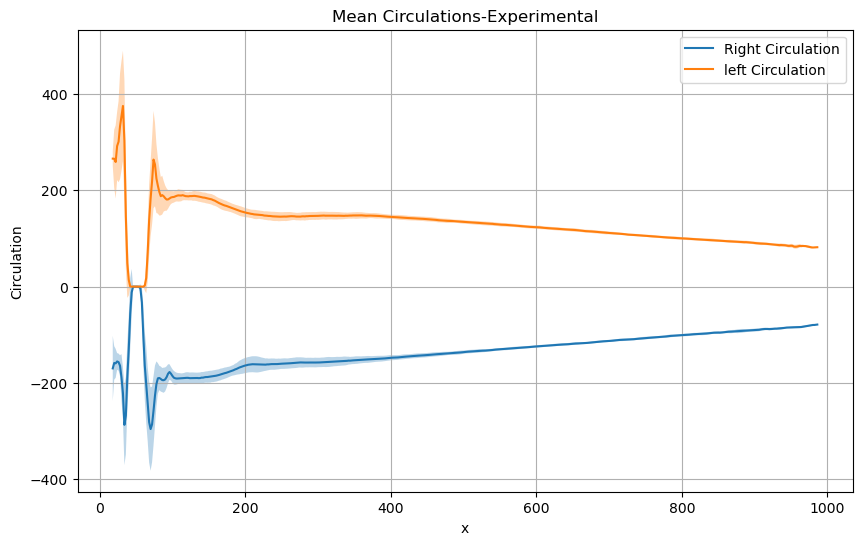

In [15]:
# Assuming 'stats_data' is your DataFrame with mean and std values
x_values = stats_data_exp['x']
right_mean = stats_data_exp['right_circ_mean']
right_std = stats_data_exp['right_circ_std']
left_mean = stats_data_exp['left_circ_mean']
left_std = stats_data_exp['left_circ_std']


plt.figure(figsize=(10, 6))
plt.plot(x_values, right_mean, label='Right Circulation')
plt.fill_between(x_values, right_mean-right_std, right_mean+right_std, alpha=0.3)

plt.plot(x_values, left_mean, label='left Circulation')
plt.fill_between(x_values, left_mean-left_std, left_mean+left_std, alpha=0.3)

plt.xlabel('x')
plt.ylabel('Circulation')
plt.title('Mean Circulations-Experimental')
plt.legend()
# plt.xlim(0,350)
# plt.ylim(0,5)
plt.grid(True)
plt.show()

In [33]:
stats_data_exp = pd.read_pickle(os.path.join(muvi.measure_path, 'vortex_measurements_avg.pkl'))
stats_data_sim = pd.read_pickle(os.path.join(vtk.npz_dir_path, 'vtk_stats_data.pkl'))


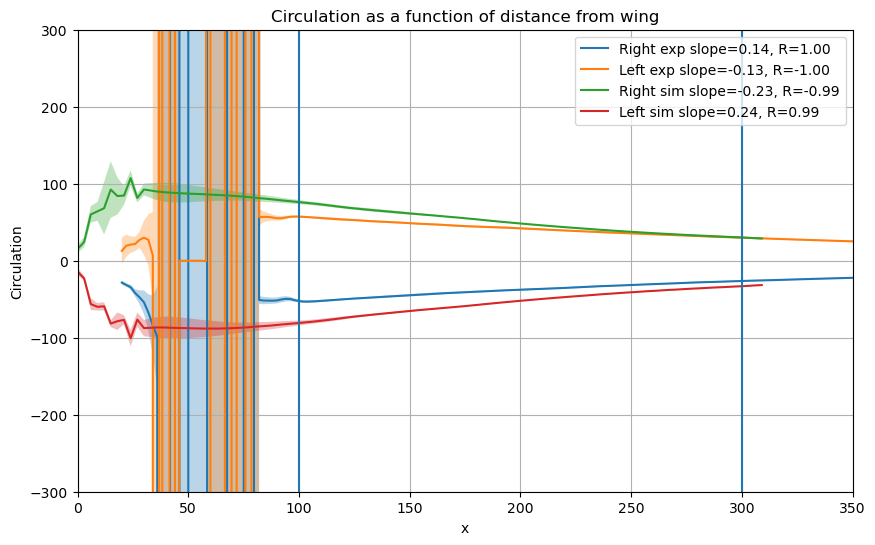

In [31]:
from scipy.stats import linregress
x_values_exp = stats_data_exp['x']
right_mean_exp = stats_data_exp['right_circ_d_mean']
right_std_exp = stats_data_exp['right_circ_d_std']
left_mean_exp = stats_data_exp['left_circ_d_mean']
left_std_exp = stats_data_exp['left_circ_d_std']

x_values_sim = stats_data_sim['x']
right_mean_sim = stats_data_sim['right_circ_d_mean']
right_std_sim = stats_data_sim['right_circ_d_std']
left_mean_sim = stats_data_sim['left_circ_d_mean']
left_std_sim = stats_data_sim['left_circ_d_std']

x_values_exp = pd.to_numeric(stats_data_exp['x'], errors='coerce')
x_values_sim = pd.to_numeric(stats_data_sim['x'], errors='coerce')

x_slope_start = 100
x_slope_end = 300

# Filter data within the range x = 100 to x = 300
def filter_data(x_values, mean_values, std_values, start=x_slope_start, end=x_slope_end):
    mask = (x_values >= start) & (x_values <= end)
    return x_values[mask], mean_values[mask], std_values[mask]

x_values_exp_100_300, right_mean_exp_100_300, _ = filter_data(x_values_exp, right_mean_exp, right_std_exp)
_, left_mean_exp_100_300, _ = filter_data(x_values_exp, left_mean_exp, left_std_exp)
x_values_sim_100_300, right_mean_sim_100_300, _ = filter_data(x_values_sim, right_mean_sim, right_std_sim)
_, left_mean_sim_100_300, _ = filter_data(x_values_sim, left_mean_sim, left_std_sim)

# Perform linear regression
def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, r_value

right_slope_exp, right_r_exp= linear_regression(x_values_exp_100_300, right_mean_exp_100_300)
left_slope_exp, left_r_exp= linear_regression(x_values_exp_100_300, left_mean_exp_100_300)
right_slope_sim, right_r_sim= linear_regression(x_values_sim_100_300, right_mean_sim_100_300)
left_slope_sim, left_r_sim= linear_regression(x_values_sim_100_300, left_mean_sim_100_300)

plt.figure(figsize=(10, 6))
plt.plot(x_values_exp, right_mean_exp, label=f'Right exp slope={right_slope_exp:.2f}, R={right_r_exp:.2f}')
plt.fill_between(x_values_exp, right_mean_exp-right_std_exp, right_mean_exp+right_std_exp, alpha=0.3)
plt.plot(x_values_exp, left_mean_exp, label=f'Left exp slope={left_slope_exp:.2f}, R={left_r_exp:.2f}')
plt.fill_between(x_values_exp, left_mean_exp-left_std_exp, left_mean_exp+left_std_exp, alpha=0.3)
plt.plot(x_values_sim, right_mean_sim, label=f'Right sim slope={right_slope_sim:.2f}, R={right_r_sim:.2f}')
plt.fill_between(x_values_sim, right_mean_sim-right_std_sim, right_mean_sim+right_std_sim, alpha=0.3)
plt.plot(x_values_sim, left_mean_sim, label=f'Left sim slope={left_slope_sim:.2f}, R={left_r_sim:.2f}')
plt.fill_between(x_values_sim, left_mean_sim-left_std_sim, left_mean_sim+left_std_sim, alpha=0.3)
plt.vlines(x_slope_start,-300,300)
plt.vlines(x_slope_end,-300,300)

plt.xlabel('x')
plt.ylabel('Circulation')
plt.title('Circulation as a function of distance from wing')
plt.legend()
plt.xlim(0,350)
plt.ylim(-300,300)
plt.grid(True)
plt.show()

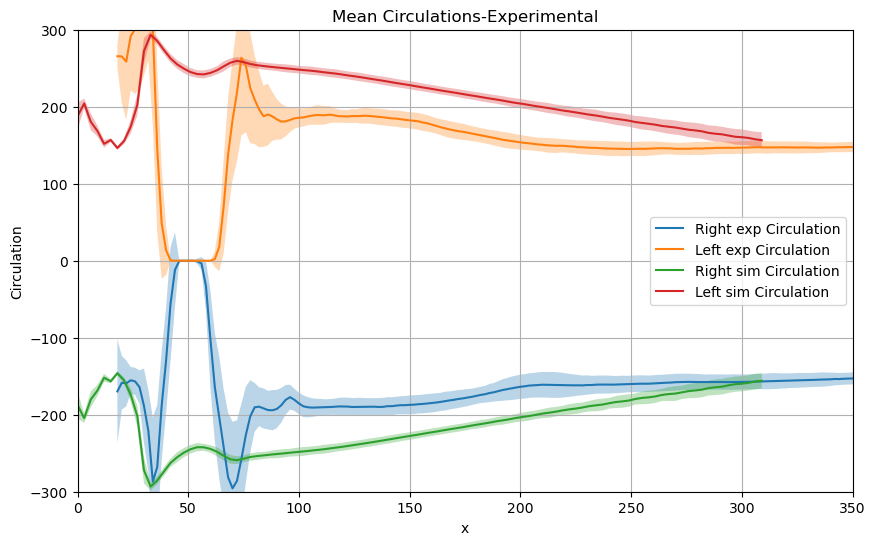

In [49]:
x_values_exp = stats_data_exp['x']
right_mean_exp = stats_data_exp['right_circ_mean']
right_std_exp = stats_data_exp['right_circ_std']
left_mean_exp = stats_data_exp['left_circ_mean']
left_std_exp = stats_data_exp['left_circ_std']

x_values_sim = stats_data_sim['dist_from_wing']
right_mean_sim = stats_data_sim['right_circ_mean']
right_std_sim = stats_data_sim['right_circ_std']
left_mean_sim = stats_data_sim['left_circ_mean']
left_std_sim = stats_data_sim['left_circ_std']


plt.figure(figsize=(10, 6))
plt.plot(x_values_exp, right_mean_exp, label='Right exp Circulation')
plt.fill_between(x_values_exp, right_mean_exp-right_std_exp, right_mean_exp+right_std_exp, alpha=0.3)
plt.plot(x_values_exp, left_mean_exp, label='Left exp Circulation')
plt.fill_between(x_values_exp, left_mean_exp-left_std_exp, left_mean_exp+left_std_exp, alpha=0.3)

plt.plot(x_values_sim, right_mean_sim, label='Right sim Circulation')
plt.fill_between(x_values_sim, right_mean_sim-right_std_sim, right_mean_sim+right_std_sim, alpha=0.3)
plt.plot(x_values_sim, left_mean_sim, label='Left sim Circulation')
plt.fill_between(x_values_sim, left_mean_sim-left_std_sim, left_mean_sim+left_std_sim, alpha=0.3)

plt.xlabel('x')
plt.ylabel('Circulation')
plt.title('Mean Circulations-Experimental')
plt.legend()
plt.xlim(0,350)
plt.ylim(-300,300)
plt.grid(True)
plt.show()

In [3]:
ifn = r"Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.000000_angle=0.000000_Re=1400.000000_0320.vtk"
bfn = os.path.splitext(ifn)[0]
ifn_npz = bfn + '.npz'
ffn = bfn + '.png'

if os.path.exists(ifn_npz):
    print('Found NPZ version of data, loading that instead of original...')
    src = LegacyVTKReader(ifn_npz)
elif os.path.exists(ifn):
    print('Loading source file... this may take a minute')
    src = LegacyVTKReader(ifn)
    print(f'Saving NPZ version of source to "{ifn_npz}"')
    src.save(ifn_npz)
else:
    raise ValueError('Source file not found!')


Found NPZ version of data, loading that instead of original...


In [4]:
# Define the 3D grid
x = np.linspace(src.points.min(axis=0)[0], src.points.max(axis=0)[1], 200)
y = np.linspace(-25, 25, 200)
z = np.linspace(-25, 25, 200)

# Create a meshgrid for 3D coordinates
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Stack the coordinates to create the 3D grid points
grid_points = np.stack([X, Y, Z], axis=-1)

print("Resampling velocity, vorticity, and concentration...")
# Note: resampling multiple fields at once is faster than one at a time
# This is because the cell index can be reused.
V, omega, c = src.resample(grid_points, 'velocity', 'vorticity', 'concentration')

V = np.transpose(V,(0,2,1,3))
omega = np.transpose(omega,(0,2,1,3))
c = np.transpose(c,(0,2,1,3))
# plt.subplot(144)
# plt.title('Dye Concentration')
# plt.imshow(c[plane,:,:,0],**imshow_kwargs)
# plt.scatter(rescaled_com_left[0], rescaled_com_left[1], color='blue', label=f'Left CoM={left_circ:.1f}mm^2/s')
# plt.scatter(rescaled_com_right[0], rescaled_com_right[1], color='red', label=f'Right CoM={right_circ:.1f}mm^2/s')
# for contour in contours:
#     plt.plot(y[contour[:, 1].astype(int)], z[contour[:, 0].astype(int)], linewidth=2)
# plt.xlabel('Y (mm)')
# plt.colorbar()


Resampling velocity, vorticity, and concentration...


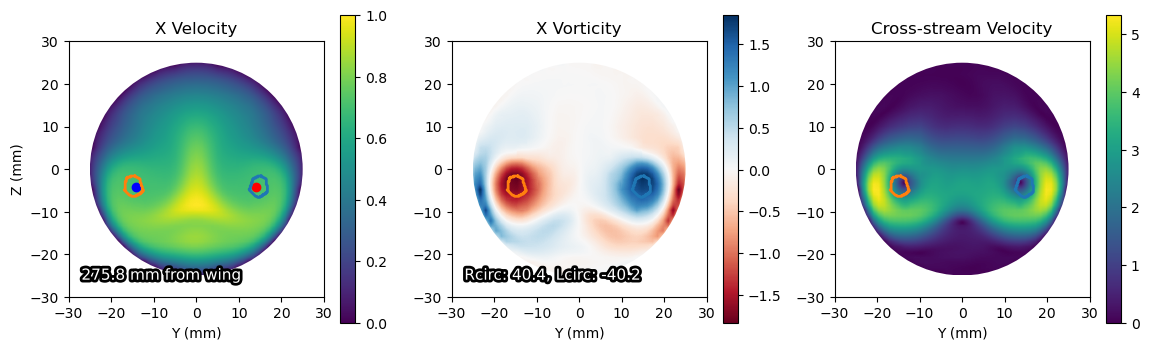

In [5]:
from matplotlib.patches import Circle

plane = 180

# Sample data loading (replace with actual data loading code)
data = omega[plane, :, :, 0]  # Assume omega is already defined
contours = measure.find_contours(c[plane,:,:,0], 0.0025)

# Define the size of the array
rows, cols = data.shape

# Create masks for the left and right halves
half_mask_left = np.zeros_like(data, dtype=bool)
half_mask_left[:, :cols // 2] = True

half_mask_right = np.zeros_like(data, dtype=bool)
half_mask_right[:, cols // 2:] = True

# Apply the masks to the data
masked_data_left = np.copy(data)
masked_data_right = np.copy(data)
masked_data_left[~half_mask_left] = np.nan  # Set excluded values to NaN for visualization
masked_data_right[~half_mask_right] = np.nan  # Set excluded values to NaN for visualization

# Define clipping ranges
min_val = 0.5
max_val = 5

# Clip the data for left mask
clipped_array_left = np.clip(masked_data_left, -max_val, -min_val)
clipped_array_left[masked_data_left < -max_val] = 0
clipped_array_left[masked_data_left > -min_val] = 0
clipped_array_left = np.nan_to_num(clipped_array_left, nan=0.0)

# Calculate center of mass for left mask
if clipped_array_left.sum() != 0:
    center_of_mass_left = ndimage.center_of_mass(clipped_array_left)
else:
    center_of_mass_left = (np.nan, np.nan)

# Clip the data for right mask
clipped_array_right = np.clip(masked_data_right, min_val, max_val)
clipped_array_right[masked_data_right < min_val] = 0
clipped_array_right[masked_data_right > max_val] = 0
clipped_array_right = np.nan_to_num(clipped_array_right, nan=0.0)

# Calculate center of mass for right mask
if clipped_array_right.sum() != 0:
    center_of_mass_right = ndimage.center_of_mass(clipped_array_right)
else:
    center_of_mass_right = (np.nan, np.nan)

# Define the new extent
extent = (-25, 25, -25, 25)
# Rescale the center of mass coordinates
rescaled_com_left = (
    ((center_of_mass_left[1] + 0.5) / cols) * (extent[1] - extent[0]) + extent[0],
    ((center_of_mass_left[0] + 0.5) / rows) * (extent[3] - extent[2]) + extent[2]
)

rescaled_com_right = (
    ((center_of_mass_right[1] + 0.5) / cols) * (extent[1] - extent[0]) + extent[0],
    ((center_of_mass_right[0] + 0.5) / rows) * (extent[3] - extent[2]) + extent[2]
)

left_circ = np.sum(clipped_array_left*(25/omega.shape[2])*(25/omega.shape[1]))
right_circ = np.sum(clipped_array_right*(25/omega.shape[2])*(25/omega.shape[1]))
imshow_kwargs = dict(origin='lower', extent=[extent[0], extent[1], extent[2], extent[3]])

plt.figure(figsize=(14, 4))
plt.subplot(131)
ax = plt.gca()
circle = Circle((0, 0), 25, transform=ax.transData)
plt.title('X Velocity')
plt.imshow(V[plane,:,:, 0],**imshow_kwargs).set_clip_path(circle)
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.scatter(rescaled_com_left[0], rescaled_com_left[1], color='blue', label=f'Left CoM={left_circ:.1f}mm^2/s')
plt.scatter(rescaled_com_right[0], rescaled_com_right[1], color='red', label=f'Right CoM={right_circ:.1f}mm^2/s')
for contour in contours:
    plt.plot(y[contour[:, 1].astype(int)], z[contour[:, 0].astype(int)], linewidth=2)
plt.text(-27,-26, f"{(x[plane]):.1f} mm from wing", color='white',fontsize=11,path_effects=[pe.withStroke(linewidth=4, foreground="black")])
plt.xlabel('Y (mm)')
plt.ylabel('Z (mm)')
plt.colorbar()
plt.subplot(132)
ax = plt.gca()
circle = Circle((0, 0), 25, transform=ax.transData)
plt.title('X Vorticity')
plt.imshow(omega[plane,:,:, 0], cmap='RdBu', **imshow_kwargs).set_clip_path(circle)
plt.xlim(-30,30)
plt.ylim(-30,30)
for contour in contours:
    plt.plot(y[contour[:, 1].astype(int)], z[contour[:, 0].astype(int)], linewidth=2)
plt.xlabel('Y (mm)')
plt.colorbar()
plt.text(-27,-26, f"Rcirc: {right_circ:.1f}, Lcirc: {left_circ:.1f}", color='white',fontsize=11,path_effects=[pe.withStroke(linewidth=4, foreground="black")])
plt.subplot(133)
ax = plt.gca()
circle = Circle((0, 0), 25, transform=ax.transData)
plt.title('Cross-stream Velocity')
plt.imshow(np.sqrt(V[plane,:,:, 1]**2+V[plane,:,:, 2]**2), cmap='viridis', **imshow_kwargs).set_clip_path(circle)
plt.xlim(-30,30)
plt.ylim(-30,30)
for contour in contours:
    plt.plot(y[contour[:, 1].astype(int)], z[contour[:, 0].astype(int)], linewidth=2)
plt.xlabel('Y (mm)')
plt.colorbar()







215.803031311731


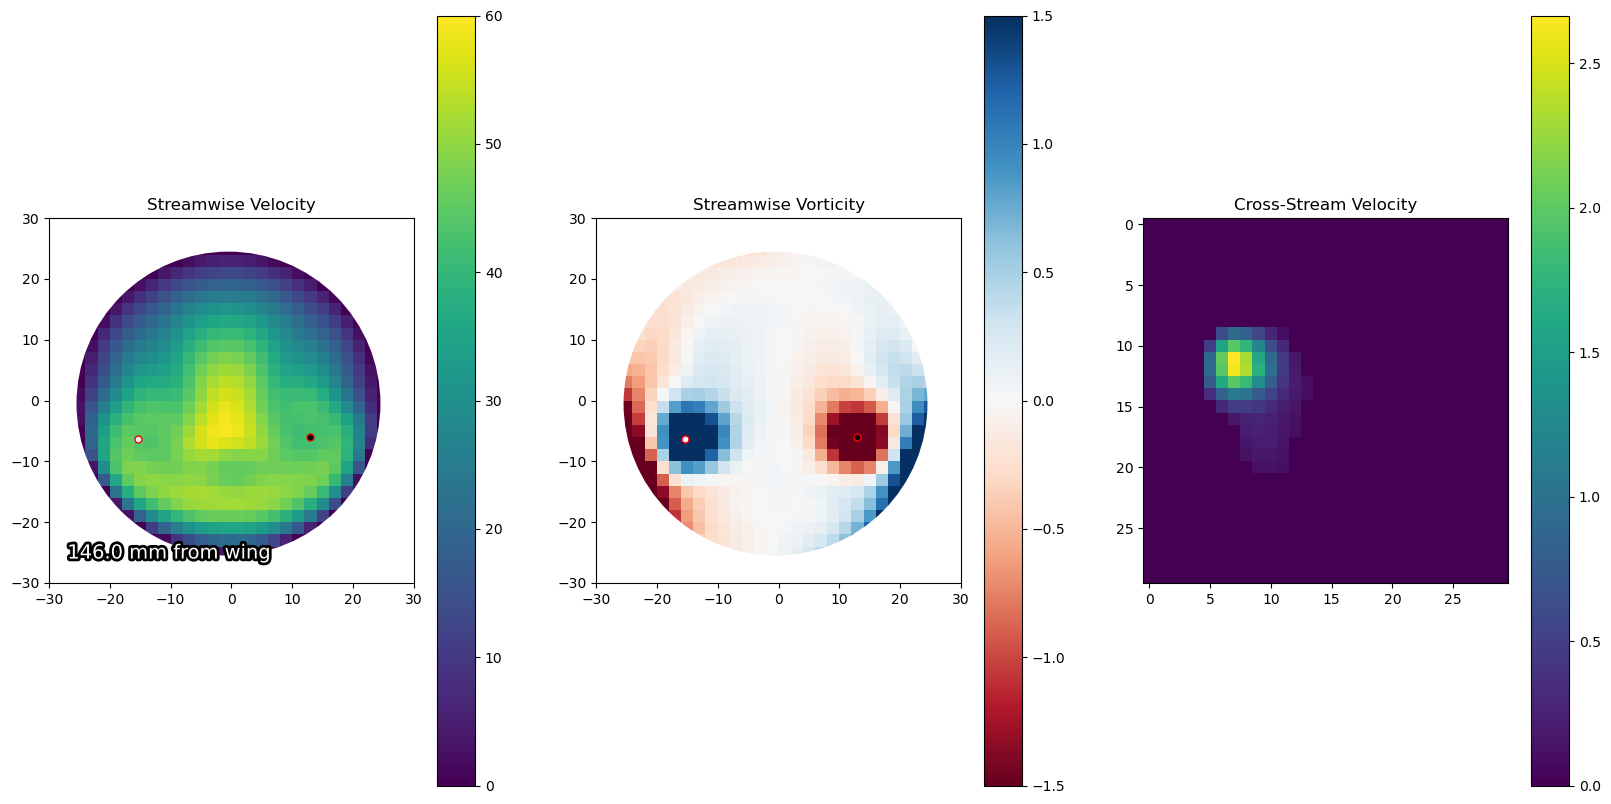

In [10]:
frame=25
V = np.load(muvi.vol_path+f'/V_frame_{frame:04}.npy', allow_pickle=False)
ω = np.load(muvi.vol_path+f'/vorticity_frame_{frame:04}.npy',allow_pickle=False)
with open(os.path.join(os.path.abspath(muvi.vti_file_path),"frameinfo.json"),"r") as file:
    frameinfo = json.load(file)
with open(os.path.join(os.path.abspath(muvi.vti_file_path),"tube_start.json"),"r") as file:
    tube_start = json.load(file)
with open(os.path.join(os.path.abspath(muvi.vti_file_path),"tube_finish.json"),"r") as file:
    tube_finish = json.load(file)
r0 = (tube_start['y_max']-tube_start['y_min']+tube_start['z_max']-tube_start['z_min'])/4
r1 = (tube_finish['y_max']-tube_finish['y_min']+tube_finish['z_max']-tube_finish['z_min'])/4
tube_details = interp1d(np.array([0, muvi.vm.info['Nt']]),(np.array([(tube_start['y_min']+tube_start['y_max'])/2,(tube_finish['y_min']+tube_finish['y_max'])/2]), np.array([(tube_start['z_min']+tube_start['z_max'])/2,(tube_finish['z_min']+tube_finish['z_max'])/2]),np.array([r0,r1]), np.array([tube_start['x_from_wing'],tube_finish['x_from_wing']])))
x_plane=75
h = np.load(os.path.join(muvi.vol_path, 'h.npy'))
N = np.load(os.path.join(muvi.vol_path, 'N.npy'))
x_in_frame = (-x_plane+(N[0]/2))*h[0]
distance_from_wing = x_in_frame+tube_details(frame)[3]

line1 = pd.read_pickle(muvi.vortex_path+'/lineloc1_'+str(frame)+'.pkl')
line2 = pd.read_pickle(muvi.vortex_path+'/lineloc2_'+str(frame)+'.pkl')
p2 = (line2.iloc[[line2['xc'].sub(-x_in_frame).abs().idxmin()]][['yc','zc']].to_numpy()[0][0], line2.iloc[[line2['xc'].sub(-x_in_frame).abs().idxmin()]][['yc','zc']].to_numpy()[0][1])
p1 = (line1.iloc[[line1['xc'].sub(-x_in_frame).abs().idxmin()]][['yc','zc']].to_numpy()[0][0], line1.iloc[[line1['xc'].sub(-x_in_frame).abs().idxmin()]][['yc','zc']].to_numpy()[0][1])

streamwise_max=60
vorticity_range=1.5
extent = (-30,30,-30,30)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(131)  
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.title.set_text('Streamwise Velocity')
ax2.title.set_text('Streamwise Vorticity')
ax3.title.set_text('Cross-Stream Velocity')

plt.subplot(131)
ax = plt.gca()
circle = Circle((tube_details(frame)[0], tube_details(frame)[1]), tube_details(frame)[2], transform=ax.transData)
plt.imshow(-V[:, :, x_plane,0]+frameinfo['cart_velocity'],clim=(0,streamwise_max), cmap='viridis', extent=extent, origin="lower").set_clip_path(circle) #Add proper cart velocity value instead of locking in at 20 here
plt.plot(p2[0],p2[1],marker="o", markersize=5, markeredgecolor="red", markerfacecolor="white")
plt.plot(p1[0],p1[1],marker="o", markersize=5, markeredgecolor="red", markerfacecolor="black")
plt.text(-27,-26, f"{(distance_from_wing):.1f} mm from wing", color='white',fontsize=14,path_effects=[pe.withStroke(linewidth=4, foreground="black")])
plt.colorbar()

plt.subplot(132)
ax = plt.gca()
circle = Circle((tube_details(frame)[0], tube_details(frame)[1]), tube_details(frame)[2], transform=ax.transData)
plt.imshow(ω[:, :, x_plane,0],clim=(-vorticity_range,vorticity_range), cmap='RdBu', extent=extent, origin="lower").set_clip_path(circle)
plt.colorbar()


 # Define the size of the array
data = ω[:, :, x_plane,0]
rows, cols = data.shape

# Create masks
half_mask_left = np.zeros_like(data, dtype=bool)
half_mask_left[:, :cols // 2] = True

half_mask_right = np.zeros_like(data, dtype=bool)
half_mask_right[:, cols // 2:] = True

# Create a circular mask to exclude a user-specified portion
radius = 24/h[1]  # Adjust the radius as needed
center = (rows // 2, cols // 2)  # Center of the circle

Y, X = np.ogrid[:rows, :cols]
dist_from_center = np.sqrt((X - center[1])**2 + (Y - center[0])**2)
circular_mask = dist_from_center <= radius

# Combine masks to create D-shaped masks
d_shape_mask_left = half_mask_left & circular_mask
d_shape_mask_right = half_mask_right & circular_mask

# Apply the masks to the data
masked_data_left = np.copy(data)
masked_data_right = np.copy(data)
masked_data_left[~d_shape_mask_left] = np.nan  # Set excluded values to NaN for visualization
masked_data_right[~d_shape_mask_right] = np.nan  # Set excluded values to NaN for visualization

# Define clipping ranges
min_val = 0.1
max_val = 5

# Clip the data
clipped_array_left = np.clip(masked_data_left, min_val, max_val)
clipped_array_right = np.clip(masked_data_right, -max_val, -min_val)

# Set the values outside the specified range to 0
clipped_array_left[masked_data_left < min_val] = 0
clipped_array_left[masked_data_left > max_val] = 0
clipped_array_left = np.nan_to_num(clipped_array_left, nan=0.0)
if clipped_array_left.sum() != 0:
    center_of_mass_left = ndimage.center_of_mass(clipped_array_left)
else:
    center_of_mass_left = (np.nan,np.nan)  # or some other default value


clipped_array_right[masked_data_right > -min_val] = 0
clipped_array_right[masked_data_right < -max_val] = 0
clipped_array_right = np.nan_to_num(clipped_array_right, nan=0.0)
if clipped_array_right.sum() != 0:
    center_of_mass_right = ndimage.center_of_mass(clipped_array_right)
else:
    center_of_mass_right = (np.nan,np.nan)  # or some other default value


# Define the new extent
extent = (-data.shape[0], data.shape[0], -data.shape[1], data.shape[1])

# Rescale the center of mass coordinates
rescaled_com_left = (
    ((center_of_mass_left[1]+0.5) / cols) * (extent[1] - extent[0]) + extent[0],
    ((center_of_mass_left[0]+0.5) / rows) * (extent[3] - extent[2]) + extent[2]
)

rescaled_com_right = (
    ((center_of_mass_right[1]+0.5) / cols) * (extent[1] - extent[0]) + extent[0],
    ((center_of_mass_right[0]+0.5) / rows) * (extent[3] - extent[2]) + extent[2]
)


plt.plot(p2[0],p2[1],marker="o", markersize=5, markeredgecolor="red", markerfacecolor="white")
plt.plot(p1[0],p1[1],marker="o", markersize=5, markeredgecolor="red", markerfacecolor="black")

plt.subplot(133)
ax = plt.gca()
circle = Circle((tube_details(frame)[0], tube_details(frame)[1]), tube_details(frame)[2], transform=ax.transData)
plt.imshow(clipped_array_left)
plt.colorbar()
print((clipped_array_left*h[1]*h[2]).sum())


In [37]:
data.shape

(30, 30)

In [46]:
V.shape

(30, 30, 151, 3)

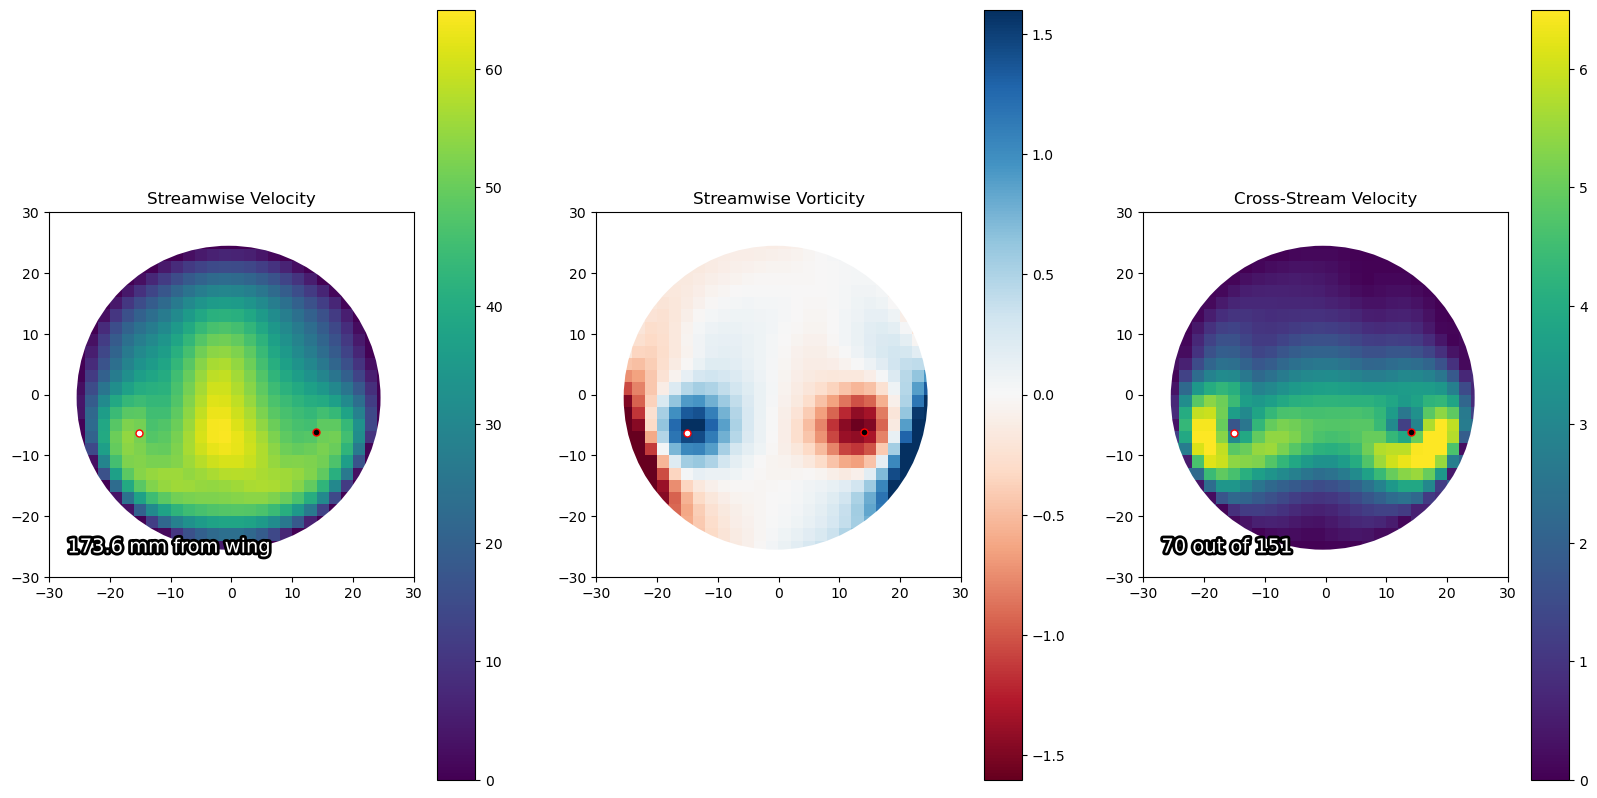

In [55]:
muvi.view_volume_slice(frame=80,x_plane=70,streamwise_max=65,vorticity_range=1.6,crosswise_max=6.5,show_d=False)

In [15]:
muvi.vortex_core_info()

In [11]:
vortex_measurements = pd.read_pickle(os.path.join(muvi.measure_path, 'vortex_measurements.pkl'))
vortex_measurements['x'].max()

989.8475402298852

In [12]:
vortex_measurements

,right_circ,right_error,left_circ,left_error,x,frame
0,-42.513694,2.269577,50.739391,3.040384,34.20000,0
1,-42.779595,2.132119,49.931051,2.903239,36.12800,0
2,-43.387557,2.077672,49.776866,2.860566,38.05600,0
3,-43.847264,2.117542,49.306090,2.704104,39.98400,0
4,-44.076950,2.233436,49.638952,2.640563,41.91200,0
...,...,...,...,...,...,...
135145,-26.309074,0.692315,25.513303,0.903226,982.13554,1324
135146,-26.109934,0.623625,25.612708,0.941492,984.06354,1324
135147,-26.172595,0.705180,25.688232,0.996845,985.99154,1324
135148,-26.371067,0.710216,25.786935,1.038931,987.91954,1324


In [142]:
# Assuming 'vortex_measurements' is your initial DataFrame and 'x_grid' is specified
x_grid = np.arange(0, vortex_measurements['x'].max(), 2)

# Assign each x value to a bin
vortex_measurements['x_bin'] = pd.cut(vortex_measurements['x'], bins=x_grid, labels=x_grid[:-1])

# Group by the bins and calculate the mean and standard deviation
stats_data = vortex_measurements.groupby('x_bin', observed=False)[['right_circ', 'left_circ']].agg(['mean', 'std']).reset_index()

# Flatten the MultiIndex columns
stats_data.columns = ['x', 'right_circ_mean', 'right_circ_std', 'left_circ_mean', 'left_circ_std']


In [129]:
stats_data[:]

,x,right_circ_mean,right_circ_std,left_circ_mean,left_circ_std
0,0.0,NaN,NaN,NaN,NaN
1,0.5,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN
3,1.5,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1994,997.0,NaN,NaN,NaN,NaN
1995,997.5,NaN,NaN,NaN,NaN
1996,998.0,NaN,NaN,NaN,NaN
1997,998.5,NaN,NaN,NaN,NaN


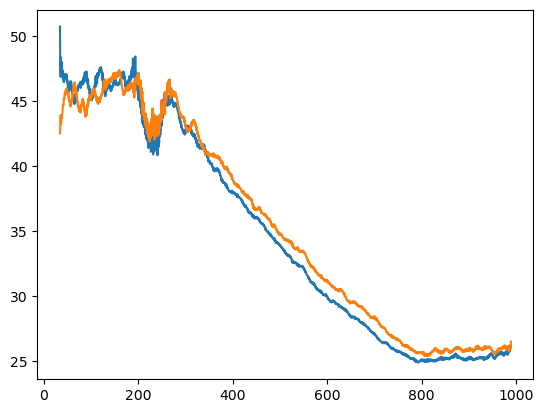

In [130]:
plt.plot(stats_data['x'],stats_data['left_circ_mean'])
plt.plot(stats_data['x'],np.abs(stats_data['right_circ_mean']))

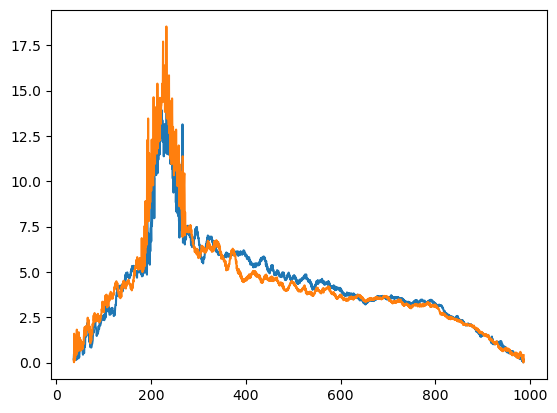

In [131]:
plt.plot(stats_data['x'],stats_data['right_circ_std'])
plt.plot(stats_data['x'],np.abs(stats_data['left_circ_std']))

In [136]:
for frame in range(1323):
    frame_data = vortex_measurements[vortex_measurements['frame'] == frame]

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, right_mean, label='Right Circulation')
    plt.fill_between(x_values, right_mean-right_std, right_mean+right_std, alpha=0.3)

    # plt.plot(x_values, left_mean, yerr=left_std, fmt='o', label='Left Circulation', capsize=3)
    plt.plot(x_values, left_mean, label='left Circulation')
    plt.fill_between(x_values, left_mean-left_std, left_mean+left_std, alpha=0.3)

    plt.plot(frame_data['x'], frame_data['right_circ'], label='right_circ')
    plt.plot(frame_data['x'], frame_data['left_circ'], label='left_circ')


    plt.xlabel('x')
    plt.ylabel('Circulation')
    plt.title('Mean Circulations as a Function of x')
    plt.legend()
    # plt.xlim(0,350)
    plt.ylim(-85,85)
    plt.grid(True)
    plt.savefig(f'circulations_{frame:04d}.png')
    plt.close()


# Define paths
output_filename =  "circulations.mp4"
input_pattern = "circulations_%04d.png"
framerate = 34.8  # Specify the framerate

# Define ffmpeg command
ffmpeg_cmd = [
    "ffmpeg", 
    "-framerate", str(framerate), 
    "-i", input_pattern, 
    "-c:v", "libx264", 
    "-r", "30", 
    "-pix_fmt", "yuv420p", 
    output_filename
]

# Run the command and capture the output
result = subprocess.run(ffmpeg_cmd, capture_output=True, text=True)

# Print the output and error (if any)
print("Standard Output:\n", result.stdout)
print("Standard Error:\n", result.stderr)

# Check if there was an error
if result.returncode != 0:
    print(f"ffmpeg command failed with return code {result.returncode}")
else:
    print("ffmpeg command executed successfully.")
    
    # Remove the .png files if the video was successfully created
    for i in range(1323):
        os.remove(f"circulations_{i:04d}.png")

    


Standard Output:
 
Standard Error:
 ffmpeg version 4.4-essentials_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (Rev6, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm -

In [77]:
grouped_data = vortex_measurements.groupby('x')[['right_circ', 'left_circ']].mean().reset_index()
grouped_data

,x,right_circ,left_circ
0,34.200000,-42.513694,50.739391
1,34.774713,-43.127502,47.691655
2,35.349425,-43.764873,46.952257
3,35.924138,-43.932367,46.852098
4,36.128000,-42.779595,49.931051
...,...,...,...
135145,987.919540,-26.371067,25.786935
135146,988.123402,-25.929647,26.067396
135147,988.698115,-25.888639,26.142534
135148,989.272828,-26.037127,26.181181


In [84]:
x_grid = np.arange(0, 1000, 1)

# Interpolate the mean and std values onto the new x grid
mean_interp = np.interp(x_grid, grouped_data['x'], grouped_data['right_circ'])
# std_interp = np.interp(x_grid, grouped_data['x'], grouped_data['right_circ_std'])

# Repeat for left_circ
left_mean_interp = np.interp(x_grid, grouped_data['x'], grouped_data['left_circ'])
# left_std_interp = np.interp(x_grid, grouped_data['x'], grouped_data['left_circ_std'])

# Create a new DataFrame with the interpolated data
interpolated_data = pd.DataFrame({
    'x': x_grid,
    'right_circ_mean': mean_interp,
    # 'right_circ_std': std_interp,
    'left_circ_mean': left_mean_interp,
    # 'left_circ_std': left_std_interp
})
interpolated_data

,x,right_circ_mean,left_circ_mean
0,0,-42.513694,50.739391
1,1,-42.513694,50.739391
2,2,-42.513694,50.739391
3,3,-42.513694,50.739391
4,4,-42.513694,50.739391
...,...,...,...
995,995,-26.482655,26.079774
996,996,-26.482655,26.079774
997,997,-26.482655,26.079774
998,998,-26.482655,26.079774


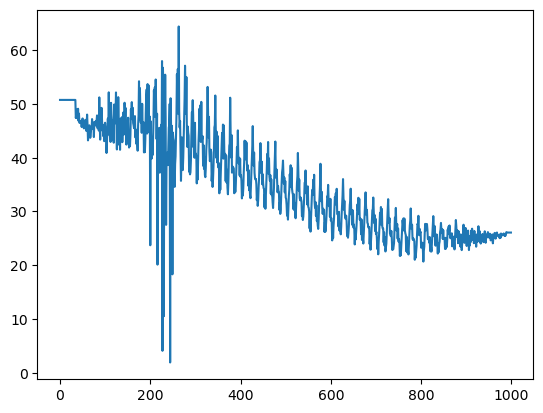

In [85]:
plt.plot(interpolated_data['x'],interpolated_data['left_circ_mean'])

(0.0, 300.0)

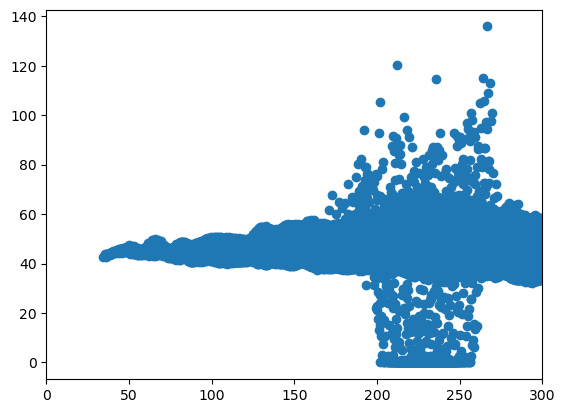

(0.0, 300.0)

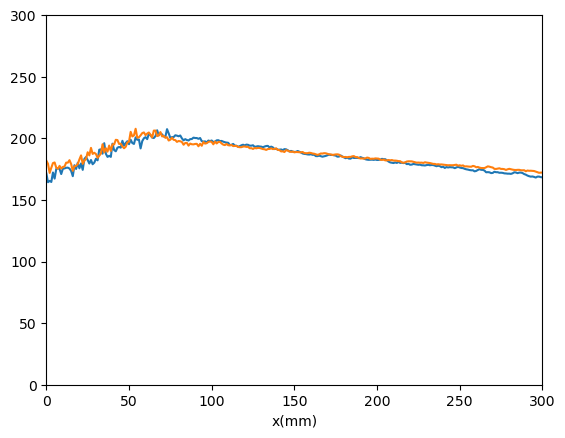

In [48]:
avg_measurements = vortex_measurements.groupby('frame').mean().reset_index()

# Rename columns to include '_avg' suffix
avg_measurements.columns = ['frame', 'right_circ_avg', 'right_error_avg', 'left_circ_avg', 'left_error_avg', 'x_avg']

# plt.plot(avg_measurements['x_avg'], avg_measurements['left_circ_avg'], label=f'Frame {frame}')
# plt.plot(avg_measurements['x_avg'], np.abs(avg_measurements['right_circ_avg']), label=f'Frame {frame}')
plt.plot(avg_measurements['frame'], avg_measurements['left_circ_avg']*4, label=f'Frame {frame}')
plt.plot(avg_measurements['frame'], np.abs(avg_measurements['right_circ_avg']*4), label=f'Frame {frame}')
# plt.xlim(200,1200)
# plt.ylim(0,10)
plt.xlabel('x(mm)')
# plt.ylabel("right error (mm)")
plt.ylim(0,300)
plt.xlim(0,300)
# plt.title(f"Right location error for frame:{frame}")

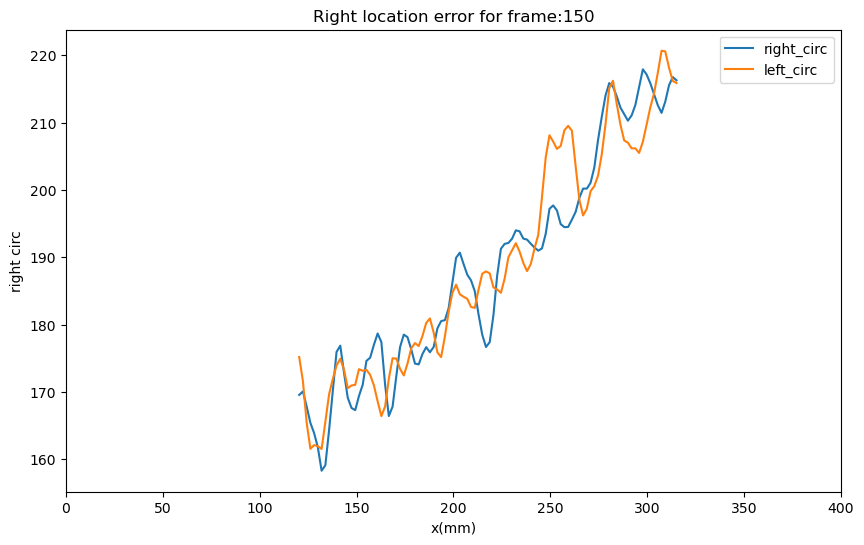

In [125]:
# Sort the dataframe by 'frame' and 'x' to ensure the data is properly ordered
vortex_measurements.sort_values(['frame', 'x'], inplace=True)

# Get unique frame values from the dataframe
unique_frames = vortex_measurements['frame'].unique()
# unique_frames = unique_frames[6:]

# Initialize the plot
plt.figure(figsize=(10, 6))
# Plot each frame as a separate line
frame=150
frame_data = vortex_measurements[vortex_measurements['frame'] == frame]
plt.plot(frame_data['x'], np.abs(frame_data['right_circ'])*4, label='right_circ')
plt.plot(frame_data['x'], frame_data['left_circ']*4, label='left_circ')
plt.xlim(0,400)
# plt.ylim(0,10)
plt.xlabel('x(mm)')
plt.ylabel("right circ")
plt.title(f"Right location error for frame:{frame}")
plt.legend()
# plt.savefig(os.path.join(muvi.figures_path,f'vortex_plot_{frame:04d}'))
# plt.close()

In [19]:
N

array([151,  30,  30], dtype=uint32)